In [2]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
#making a directory
!mkdir ~/.kaggle

In [ ]:
#Copy the kaggle.json to created folder
!/content/kaggle.json ~/.kaggle/

In [ ]:
#permisson for the json to act
! chmod 600 /content/kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d aminizahra/tips-dataset    #tip dataset
!kaggle datasets download -d yasserh/titanic-dataset    #titanic dataset
!kaggle datasets download -d uciml/iris    #iris dataset

In [ ]:
!unzip /content/tips-dataset.zip #tip dataset
!unzip /content/titanic-dataset.zip    #titanic dataset
!unzip /content/iris.zip    #iris dataset

In [17]:
import pandas as pd
tip=pd.read_csv('/content/tips.csv')
iris=pd.read_csv('/content/Iris.csv')
titanic=pd.read_csv('/content/Titanic-Dataset.csv')

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
tip.sample(4).reset_index()

,index,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,212,48.33,9.00,Male,No,Sat,Dinner,4,12.08,Alex Williamson,676218815212,Sat4590
1,52,34.81,5.20,Female,No,Sun,Dinner,4,8.70,Emily Daniel,4291280793094374,Sun6165
2,182,45.35,3.50,Male,Yes,Sun,Dinner,3,15.12,Jose Parsons,4112207559459910,Sun2337
3,95,40.17,4.73,Male,Yes,Fri,Dinner,4,10.04,Aaron Bentley,180026611638690,Fri9628


In [95]:
iris.sample(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
141,142,6.9,3.1,5.1,2.3,Iris-virginica
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
144,145,6.7,3.3,5.7,2.5,Iris-virginica


In [96]:
titanic.sample(3).reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.050,NaN,S
1,298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.500,C106,S
2,719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.775,NaN,S


**Scatter Plot(Numaric-Numeric)**

<Axes: xlabel='total_bill', ylabel='tip'>

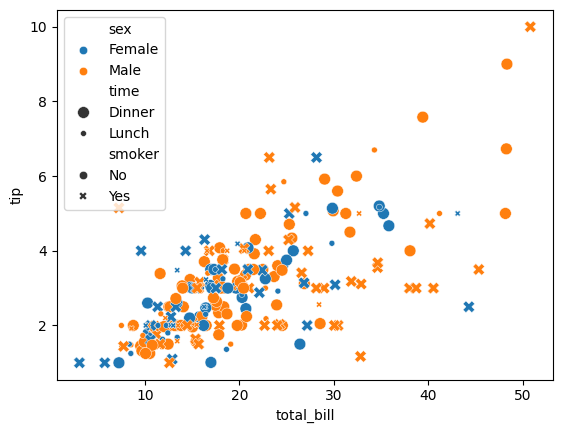

In [39]:
sns.scatterplot(x=tip['total_bill'],y=tip['tip'],hue=tip['sex'],style=tip['smoker'],size=tip['time'])

**BAR-Plot(Numberical-Categorical)**

<Axes: xlabel='Pclass', ylabel='Age'>

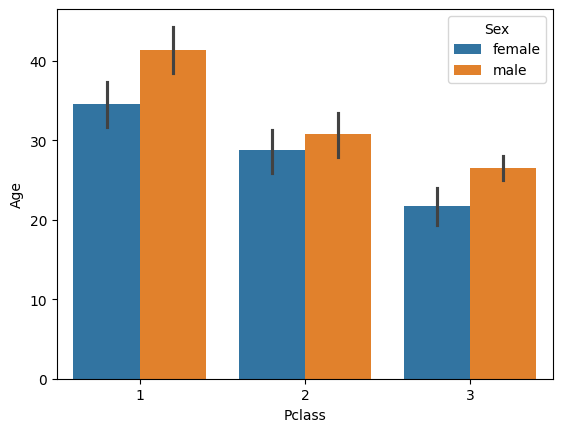

In [46]:
sns.barplot(x=titanic['Pclass'],y=titanic['Age'],hue=titanic['Sex'])

**Box-plot**

<Axes: xlabel='Sex', ylabel='Age'>

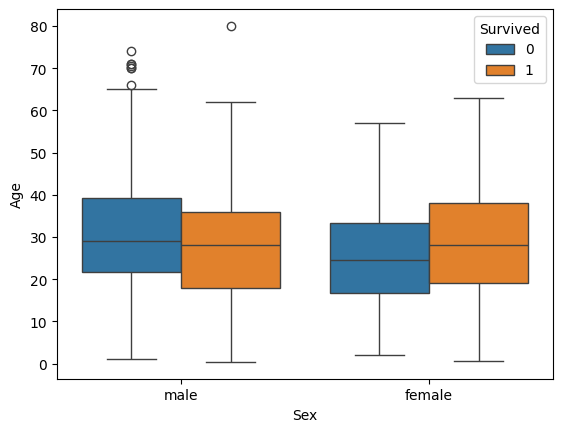

In [49]:
sns.boxplot(x=titanic['Sex'],y=titanic['Age'],hue=titanic['Survived'])

**distplot**

<ipython-input-60-7bc220447675>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==1]['Age'],hist=False) # survived people on the based on their age
<ipython-input-60-7bc220447675>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Surv

<Axes: xlabel='Age', ylabel='Density'>

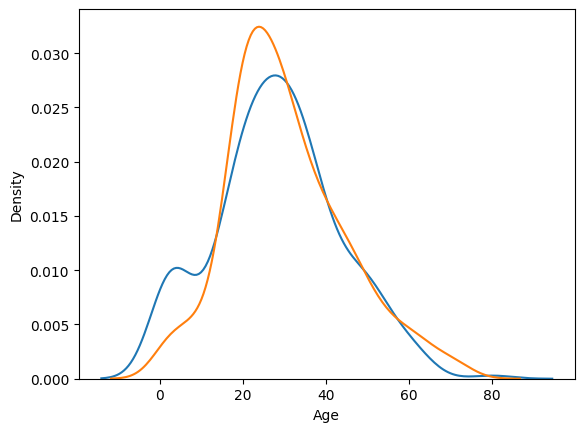

In [60]:
sns.distplot(titanic[titanic['Survived']==1]['Age'],hist=False) # survived people on the based on their age
sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False)# opposite of above


In [63]:
titanic[titanic['Survived']==1]['Pclass'].value_counts() # live passenger class people

Pclass
1    136
3    119
2     87
Name: count, dtype: int64

In [64]:
titanic[titanic['Survived']==0]['Pclass'].value_counts()   # Death passenger class people

Pclass
3    372
2     97
1     80
Name: count, dtype: int64

In [65]:
titanic['Pclass'].value_counts()  # total number of  passenger class people

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

**we can use the crosstab method that in present in pandas to make easily understable**

In [67]:
import pandas as pd
pd.crosstab(titanic['Survived'],titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


**GroupBy**  1st-categorical and 2nd-numberical

In [85]:
titanic.groupby('Sex')['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [86]:
titanic.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7,C118,C
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.0,0,0,248731,13.5,NaN,S


In [88]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [87]:
titanic.groupby('Embarked')['Survived'].mean()*100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

**Pairplot** --->it is collection of Scatterplot of multiple collection of numberical data

In [89]:
iris.sample(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,15,5.8,4.0,1.2,0.2,Iris-setosa
93,94,5.0,2.3,3.3,1.0,Iris-versicolor


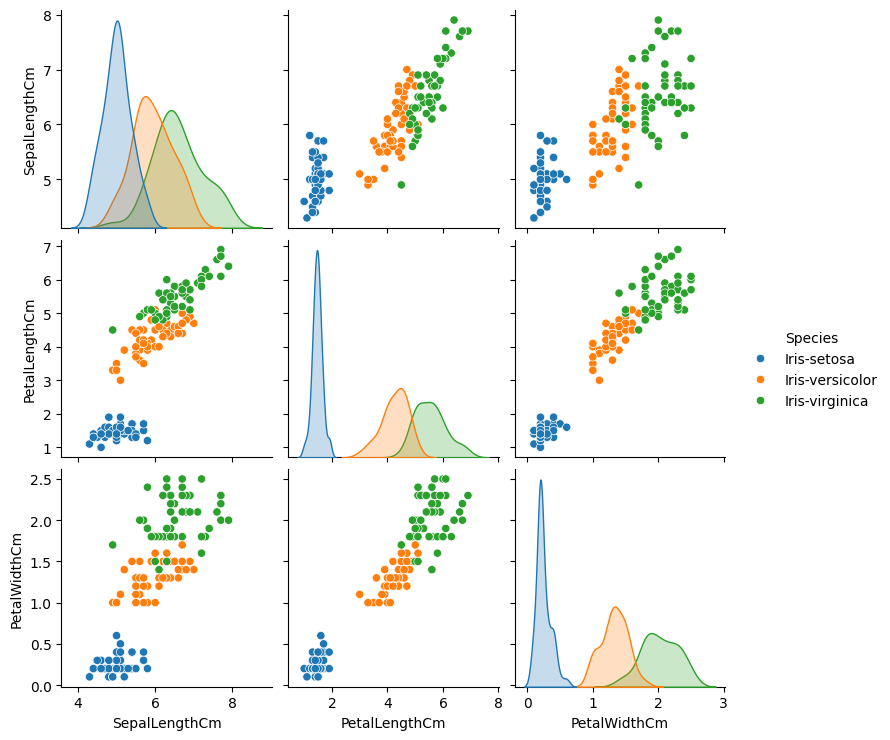

In [93]:
sns.pairplot(data=iris,vars=['SepalLengthCm','PetalLengthCm','PetalWidthCm'],hue='Species')